In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px

In [21]:
state_data = pd.read_csv('Resources/state_data.csv')
state_df1 = pd.DataFrame(state_data)

income_data = pd.read_csv('median_household_income.csv')
income_df = pd.DataFrame(income_data)

state_df = state_df1.merge(income_df, on='state', how='left')

In [22]:
sorted_df = state_df.sort_values(by='early_death_years_lost', ascending=True)
sorted_df['Category'] = ''

# Assign 'Top 10' for the first 10 entries
sorted_df.iloc[:5, sorted_df.columns.get_loc('Category')] = 'Top 5'

# Assign 'Bottom 10' for the last 10 entries
sorted_df.iloc[-5:, sorted_df.columns.get_loc('Category')] = 'Bottom 5'

# Reset index if desired
sorted_df.reset_index(drop=True, inplace=True)

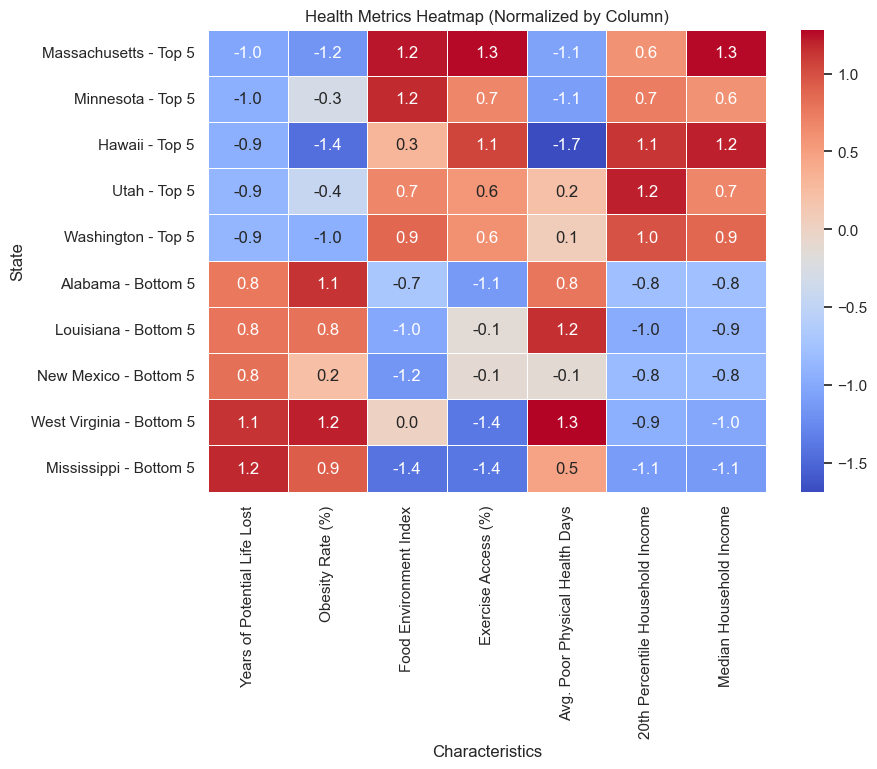

In [24]:
sns.set_theme()

sorted_df = sorted_df[sorted_df['Category'] != ''].copy()

heatmap_df = sorted_df[['state', 'early_death_years_lost','adult_obesity_pct', 'food_environment_index', 'exercise_access_pct', 'poor_physical_health_avg_days', 'income_inequal_20pct','Median_Household_Income']].copy()

top_states = ['Massachusetts','Minnesota','Hawaii','Utah','Washington']
heatmap_df['state'] = heatmap_df['state'].apply(lambda x: f"{x} - Top 5" if x in top_states else f"{x} - Bottom 5")
heatmap_df.set_index('state', inplace=True)

heatmap_df.columns = ['Years of Potential Life Lost','Obesity Rate (%)', 'Food Environment Index', 'Exercise Access (%)', 'Avg. Poor Physical Health Days', '20th Percentile Household Income','Median Household Income']

heatmap_df_normalized = heatmap_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap_df_normalized, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Set axis labels
ax.set_xlabel('Characteristics')
ax.set_ylabel('State')
plt.title('Health Metrics Heatmap (Normalized by Column)')
plt.show()

## Interesting State Facts

Massachusetts
- Has an individual health insurance mandate which requires most adults to carry health insurance if it is affordable to them that meet certain standards
- Since the passage and implementation of the state's 2006 health reform law, Massachusetts has achieved and maintained hte highest levels of health insurance in the nation
- Source: https://www.mahealthconnector.org/about/policy-center/rules-regulations/massachusetts-individual-mandate#:~:text=Massachusetts%20has%20an%20%E2%80%9Cindividual%20health,Creditable%20Coverage%E2%80%9D%20or%20MCC).